In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math 

Text(0, 0.5, 'position')

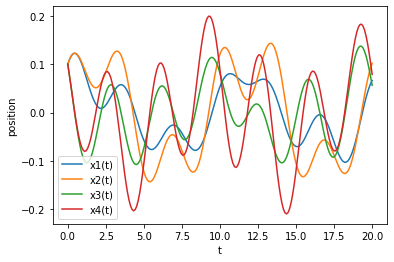

In [17]:
# parameters k and m
k = 1
m = 1

# defining the set of eight, coupled 1st-order odes, after converting from four, coupled 2nd-order odes.
def model(sol, t):
    x1, x2, x3, x4, y1, y2, y3, y4 = sol
 
    dx1dt = y1
    dy1dt = (-k*x1 + k*(x2-x1))/m
    dx2dt = y2
    dy2dt = (-k*(x2-x1) + k*(x3-x2))/m
    dx3dt = y3
    dy3dt = (-k*(x3-x2) + k*(x4-x3))/m
    dx4dt = y4
    dy4dt = (-k*x4 - k*(x4-x3))/m
 
    return [dx1dt, dx2dt, dx3dt, dx4dt, dy1dt, dy2dt, dy3dt, dy4dt]

# creating a time domain
t_span = np.linspace(0, 20, 200)

# ICs
x1_0 = .1
y1_0 = 0
x2_0 = .1
y2_0 = 0
x3_0 = .1
y3_0 = 0
x4_0 = .1
y4_0 = 0
 
sol_zero = [x1_0, y1_0, x2_0, y2_0, x3_0, y3_0, x4_0, y4_0]
 
solution = odeint(model, sol_zero, t_span)

plt.plot(t_span, solution[:, 0], label='x1(t)')
plt.plot(t_span, solution[:, 2], label='x2(t)')
plt.plot(t_span, solution[:, 4], label='x3(t)')
plt.plot(t_span, solution[:, 6], label='x4(t)')

plt.legend()
plt.xlabel('t')
plt.ylabel('position')

In [19]:
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import quad
from scipy.interpolate import InterpolatedUnivariateSpline as interpolate
from scipy.optimize import root
from scipy.misc import derivative
import scipy.linalg as lg

# install "numdifftools" with 'conda install numdifftools'
from numdifftools import Jacobian

import sympy as sp
import fractions as fra

from ipywidgets import interact

In [23]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib as mpl
import matplotlib.pyplot as plt

import matplotlib.ticker as ticker
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
%run -i "rcParameters.py"
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["font.family"]='Times New Roman'
plt.rcParams["mathtext.fontset"]='stix';

In [24]:
# set fontsize in markdown cells
from IPython.core.display import display, HTML, Latex
display(HTML("<style>.rendered_html { font-size: 16px; }</style>"))

In [52]:
k, m, w = sp.symbols('k,m,w',real=True)
# define system matrix
A_RJ = sp.Matrix([[2*k - m*w**2,-k,0,0],[k,2*k - m*w**2, -k, 0],[0, k, 2*k - m*w**2, -k], [0, 0, k, 2*k - m*w**2]])
display(A_RJ)
# find trace and determinant
tr_  = A_RJ.trace()
det_ = A_RJ.det()
# display determinant
display(Latex(r'$\Delta = det(A) = {}$'.format(sp.latex(det_))))

Matrix([
[2*k - m*w**2,           -k,            0,            0],
[           k, 2*k - m*w**2,           -k,            0],
[           0,            k, 2*k - m*w**2,           -k],
[           0,            0,            k, 2*k - m*w**2]])

<IPython.core.display.Latex object>

In [50]:
from sympy import roots
from sympy import solve
from sympy import latex
roots_ = solve(det_, w)
display(Latex('Roots are: ${}$ \n ${}$ \n ${}$ \n ${}$'.format(sp.latex(roots_[:2]), sp.latex(roots_[2:4]), sp.latex(roots_[4:6]), sp.latex(roots_[6:]))))

<IPython.core.display.Latex object>